In [1]:
import pandas as pd
import numpy as np
import os
import shutil
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# display all rows and columns in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_excel('Castellvi_list.xlsx')

In [3]:
df

,Id,Full_Id,Castellvi,2a/3a Side,Sacrum Seg,Last_L,Split,Comment
0,4,sub-verse004,0,NaN,1.0,L5,NaN,NaN
1,5,sub-verse005,0,NaN,1.0,L5,NaN,NaN
2,6,sub-verse006,0,NaN,1.0,L5,NaN,NaN
3,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,sub-verse008,0,NaN,1.0,L5,NaN,NaN
5,9,sub-verse009,0,NaN,1.0,L5,NaN,NaN
6,10,sub-verse010,0,NaN,1.0,L5,NaN,NaN
7,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,13,sub-verse013,0,NaN,1.0,L5,NaN,NaN


In [4]:
df.isna().sum()

Id              0
Full_Id        58
Castellvi      49
2a/3a Side    447
Sacrum Seg     40
Last_L         58
Split         516
Comment       513
dtype: int64

In [5]:
# Drop rows if full Id is missing
df = df.dropna(subset=['Full_Id'])
df.isna().sum()

Id              0
Full_Id         0
Castellvi       0
2a/3a Side    389
Sacrum Seg      0
Last_L          0
Split         458
Comment       455
dtype: int64

In [6]:
# filter df if castellvi column value is 2a 3a or 4 
filtered_df = df[df['Castellvi'].isin(['2a', '3a', '4'])]
# check if 2a/3a columns is missing
filtered_df.isna().sum()

Id             0
Full_Id        0
Castellvi      0
2a/3a Side     0
Sacrum Seg     0
Last_L         0
Split         61
Comment       58
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 458 entries, 0 to 497
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          458 non-null    object 
 1   Full_Id     458 non-null    object 
 2   Castellvi   458 non-null    object 
 3   2a/3a Side  69 non-null     object 
 4   Sacrum Seg  458 non-null    float64
 5   Last_L      458 non-null    object 
 6   Split       0 non-null      float64
 7   Comment     3 non-null      object 
dtypes: float64(2), object(6)
memory usage: 32.2+ KB


0     289
2a     43
3b     33
2b     31
1b     21
3a     18
1a     15
4       8
Name: Castellvi, dtype: int64

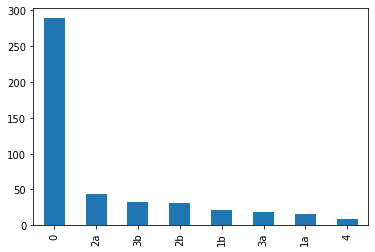

In [8]:
# plot the distribution of 2a,2b,3a,3b to other cases (show sum of 2a,2b,3a,3b) : 
df['Castellvi'].value_counts().plot(kind='bar') # show sum of 2a,2b,3a,3b
df['Castellvi'].value_counts()

In [9]:
# We will merge 1 cases with 0 cases based on medical advice
# replace all 1a and 1b with 0
df['Castellvi'] = df['Castellvi'].replace(['1a', '1b'], '0')

/tmp/ipykernel_2163966/905220530.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Castellvi'] = df['Castellvi'].replace(['1a', '1b'], '0')


In [10]:
# print uniqe values counts in Castellvi column
df['Castellvi'].value_counts()

0     289
2a     43
0      36
3b     33
2b     31
3a     18
4       8
Name: Castellvi, dtype: int64

In [11]:
# We will replace all NaN values in 2a/3a side column with None 
df = df.fillna("None")

In [12]:
df.isna().sum()

Id            0
Full_Id       0
Castellvi     0
2a/3a Side    0
Sacrum Seg    0
Last_L        0
Split         0
Comment       0
dtype: int64

In [13]:
df['Castellvi'] = df['Castellvi'].astype(str)
train_df, test_df = train_test_split(df, test_size=0.1, stratify=df['Castellvi'], random_state=42)
# Further split the training data into 80% for training and 20% for validation
train_df, val_df = train_test_split(train_df, test_size=0.2, stratify=train_df['Castellvi'], random_state=42)

In [14]:
Split = []
for i in df.Full_Id:
    if i in train_df.Full_Id.values:
        Split.append('train')
    elif i in val_df.Full_Id.values:
        Split.append('val')
    elif i in test_df.Full_Id.values:
        Split.append('test')
    else:
        continue

In [15]:
df['Split'] = Split

In [16]:
df.head()

,Id,Full_Id,Castellvi,2a/3a Side,Sacrum Seg,Last_L,Split,Comment
0,4,sub-verse004,0,None,1.0,L5,train,None
1,5,sub-verse005,0,None,1.0,L5,train,None
2,6,sub-verse006,0,None,1.0,L5,train,None
4,8,sub-verse008,0,None,1.0,L5,val,None
5,9,sub-verse009,0,None,1.0,L5,train,None


In [17]:
# add new column for Flip
df['Flip'] = 0

In [18]:
train_df['Castellvi'].value_counts()

0     233
2a     31
3b     24
2b     22
3a     13
4       6
Name: Castellvi, dtype: int64

In [19]:
val_df['Castellvi'].value_counts()

0     59
2a     8
3b     6
2b     6
3a     3
4      1
Name: Castellvi, dtype: int64

In [20]:
test_df['Castellvi'].value_counts()

0     33
2a     4
3b     3
2b     3
3a     2
4      1
Name: Castellvi, dtype: int64

In [21]:
# duplicate all rows in df and set the flip column to 1 and combine it with the original df
mask = df['Castellvi'].isin(['0', '2a', '2b', '3a', '3b', '4'])
# Step 2: make a copy of these rows
new_rows = df.loc[mask].copy()

In [22]:
# Step 3: set 'Flip' to 1 for these rows
new_rows['Flip'] = 1

In [23]:
new_rows['2a/3a Side'] = new_rows['2a/3a Side'].apply(lambda x: 'L' if x == 'R' else 'R' if x == 'L' else None)

In [24]:
df['Id'] = df['Id'].astype(str)
new_rows['Id'] = new_rows['Id'].astype(str)

# Step 4: append these new rows to the original DataFrame
df = pd.concat([df, new_rows], ignore_index=True)

# optionally, you can sort by 'Id' to have the duplicated entries directly below the original ones
df = df.sort_values(by='Id').reset_index(drop=True)

In [25]:
df

,Id,Full_Id,Castellvi,2a/3a Side,Sacrum Seg,Last_L,Split,Comment,Flip
0,10,sub-verse010,0,None,1.0,L5,train,None,1
1,10,sub-verse010,0,None,1.0,L5,train,None,0
2,101,sub-verse101,0,None,1.0,L5,train,None,0
3,101,sub-verse101,0,None,1.0,L5,train,None,1
4,102,sub-verse102,0,None,1.0,L5,val,None,1
5,102,sub-verse102,0,None,1.0,L5,val,None,0
6,104,sub-verse104,0,None,1.0,L5,test,None,0
7,104,sub-verse104,0,None,1.0,L5,test,None,1
8,107,sub-verse107,0,None,1.0,L5,train,None,0
9,107,sub-verse107,0,None,1.0,L5,train,None,1


In [26]:
# display rows where castellvi is 4 
df[df['Castellvi'] == '4']

,Id,Full_Id,Castellvi,2a/3a Side,Sacrum Seg,Last_L,Split,Comment,Flip
200,518,sub-verse518,4,L,1.0,L6,train,None,1
201,518,sub-verse518,4,R,1.0,L6,train,None,0
246,545,sub-verse545,4,R,1.0,L6,train,None,1
247,545,sub-verse545,4,L,1.0,L6,train,None,0
266,555,sub-verse555,4,R,1.0,L6,test,None,0
267,555,sub-verse555,4,L,1.0,L6,test,None,1
282,563,sub-verse563,4,R,1.0,L5,train,None,1
283,563,sub-verse563,4,L,1.0,L5,train,None,0
318,587,sub-verse587,4,R,1.0,L5,train,None,1
319,587,sub-verse587,4,L,1.0,L5,train,None,0
